# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Evan Santosa
- **Email:** esantosa.es@gmail.com
- **ID Dicoding:** xtorch8

## Menentukan Pertanyaan Bisnis

- Bagaimana urutan station dengan rata-rata kualitas udara terbaik?
- Bagaimana hubungan antara waktu dengan kualitas udara?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
aotizhongxin_df = pd.read_csv("data/PRSA_Data_Aotizhongxin_20130301-20170228.csv")
aotizhongxin_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [3]:
changping_df = pd.read_csv("data/PRSA_Data_Changping_20130301-20170228.csv")
changping_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


In [4]:
dingling_df = pd.read_csv("data/PRSA_Data_Dingling_20130301-20170228.csv")
dingling_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [5]:
dongsi_df = pd.read_csv("data/PRSA_Data_Dongsi_20130301-20170228.csv")
dongsi_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi


In [6]:
guanyuan_df = pd.read_csv("data/PRSA_Data_Guanyuan_20130301-20170228.csv")
guanyuan_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


In [7]:
gucheng_df = pd.read_csv("data/PRSA_Data_Gucheng_20130301-20170228.csv")
gucheng_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
1,2,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
2,3,2013,3,1,2,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
3,4,2013,3,1,3,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
4,5,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng


In [8]:
huairou_df = pd.read_csv("data/PRSA_Data_Huairou_20130301-20170228.csv")
huairou_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,7.0,7.0,3.0,2.0,100.0,91.0,-2.3,1020.3,-20.7,0.0,WNW,3.1,Huairou
1,2,2013,3,1,1,4.0,4.0,3.0,NaN,100.0,92.0,-2.7,1020.8,-20.5,0.0,NNW,1.5,Huairou
2,3,2013,3,1,2,4.0,4.0,NaN,NaN,100.0,91.0,-3.2,1020.6,-21.4,0.0,NW,1.8,Huairou
3,4,2013,3,1,3,3.0,3.0,3.0,2.0,NaN,NaN,-3.3,1021.3,-23.7,0.0,NNW,2.4,Huairou
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,300.0,86.0,-4.1,1022.1,-22.7,0.0,NNW,2.2,Huairou


In [9]:
nongzhanguan_df = pd.read_csv("data/PRSA_Data_Nongzhanguan_20130301-20170228.csv")
nongzhanguan_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan


In [10]:
shunyi_df = pd.read_csv("data/PRSA_Data_Shunyi_20130301-20170228.csv")
shunyi_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


In [11]:
tiantan_df = pd.read_csv("data/PRSA_Data_Tiantan_20130301-20170228.csv")
tiantan_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan


In [12]:
wanliu_df = pd.read_csv("data/PRSA_Data_Wanliu_20130301-20170228.csv")
wanliu_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu
1,2,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu
2,3,2013,3,1,2,3.0,6.0,NaN,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu
3,4,2013,3,1,3,11.0,30.0,8.0,14.0,NaN,NaN,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu
4,5,2013,3,1,4,3.0,13.0,9.0,NaN,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu


In [13]:
wanshouxigong_df = pd.read_csv("data/PRSA_Data_Wanshouxigong_20130301-20170228.csv")
wanshouxigong_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong
1,2,2013,3,1,1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong
2,3,2013,3,1,2,8.0,8.0,NaN,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong
3,4,2013,3,1,3,8.0,8.0,3.0,16.0,NaN,NaN,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong
4,5,2013,3,1,4,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong


**Insight:**
- Semua file csv telah memiliki kolom yang sama, yaitu:
    * No
    * year
    * month
    * day
    * hour
    * PM2.5
    * PM10 
    * SO2
    * NO2
    * CO2
    * O3
    * TEMP
    * PRES
    * DEWP
    * RAIN
    * wd
    * WSPM
    * station

- Semua file csv tersebut baru memiliki informasi kandungan polutan-polutan dari udara. Namun, masih belum memiliki kolom yang menyatakan kualitas yang terstandarisasi, seperti AQI. 
- Agar dapat fokus pada AQI, kolom No, TEMP, PRES, DEWP, wd, dan WSPM akan dihapus karena kurang relevan. 

### Assessing Data

In [14]:
def assesing_data_handler(df):
    """
    Function ini bertujuan untuk menilai dataset yang ada dengan mengetahui
    informasi, jumlah missing values, jumlah data yang duplikat, dan rangkuman
    statistik deskriptif.

    Parameter:
    - df    : Pandas DataFrame.

    Return:
    - None.
    """
    try:
        if not isinstance(df, pd.DataFrame):
            print("Data harus memiliki tipe data Pandas DataFrame")
        else:
            print("info: ")
            print(df.info())

            print("null: ")
            print(df.isna().sum())

            print("duplicate: ")
            print(df.duplicated().sum())

            print("describe: ")
            print(df.describe())
    except Exception as e:
        print("Terjadi error ketika assessing data: ", e)

In [15]:
assesing_data_handler(aotizhongxin_df)

info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
None
null: 
No            0
year          0
month         0
d

In [16]:
assesing_data_handler(changping_df)

info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
None
null: 
No            0
year          0
month         0
d

In [17]:
assesing_data_handler(dingling_df)

info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
None
null: 
No            0
year          0
month         0
d

In [18]:
assesing_data_handler(dongsi_df)

info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34314 non-null  float64
 6   PM10     34511 non-null  float64
 7   SO2      34401 non-null  float64
 8   NO2      33463 non-null  float64
 9   CO       31867 non-null  float64
 10  O3       34400 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
None
null: 
No            0
year          0
month         0
d

In [19]:
assesing_data_handler(guanyuan_df)

info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34448 non-null  float64
 6   PM10     34635 non-null  float64
 7   SO2      34590 non-null  float64
 8   NO2      34405 non-null  float64
 9   CO       33311 non-null  float64
 10  O3       33891 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
None
null: 
No            0
year          0
month         0
d

In [20]:
assesing_data_handler(gucheng_df)

info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34418 non-null  float64
 6   PM10     34683 non-null  float64
 7   SO2      34557 non-null  float64
 8   NO2      34396 non-null  float64
 9   CO       33663 non-null  float64
 10  O3       34335 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35013 non-null  float64
 14  RAIN     35021 non-null  float64
 15  wd       34905 non-null  object 
 16  WSPM     35022 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
None
null: 
No            0
year          0
month         0
d

In [21]:
assesing_data_handler(huairou_df)

info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34111 non-null  float64
 6   PM10     34287 non-null  float64
 7   SO2      34084 non-null  float64
 8   NO2      33425 non-null  float64
 9   CO       33642 non-null  float64
 10  O3       33913 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35011 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35009 non-null  float64
 15  wd       34762 non-null  object 
 16  WSPM     35015 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
None
null: 
No            0
year          0
month         0
d

In [22]:
assesing_data_handler(nongzhanguan_df)

info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34436 non-null  float64
 6   PM10     34624 non-null  float64
 7   SO2      34618 non-null  float64
 8   NO2      34372 non-null  float64
 9   CO       33858 non-null  float64
 10  O3       34558 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
None
null: 
No            0
year          0
month         0
d

In [23]:
assesing_data_handler(shunyi_df)

info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34151 non-null  float64
 6   PM10     34516 non-null  float64
 7   SO2      33768 non-null  float64
 8   NO2      33699 non-null  float64
 9   CO       32886 non-null  float64
 10  O3       33575 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35013 non-null  float64
 13  DEWP     35010 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34581 non-null  object 
 16  WSPM     35020 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
None
null: 
No            0
year          0
month         0
d

In [24]:
assesing_data_handler(tiantan_df)

info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34387 non-null  float64
 6   PM10     34467 non-null  float64
 7   SO2      33946 non-null  float64
 8   NO2      34320 non-null  float64
 9   CO       33938 non-null  float64
 10  O3       34221 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
None
null: 
No            0
year          0
month         0
d

In [25]:
assesing_data_handler(wanliu_df)

info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34682 non-null  float64
 6   PM10     34780 non-null  float64
 7   SO2      34489 non-null  float64
 8   NO2      33994 non-null  float64
 9   CO       33252 non-null  float64
 10  O3       32957 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34941 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
None
null: 
No            0
year          0
month         0
d

In [26]:
assesing_data_handler(wanshouxigong_df)

info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34368 non-null  float64
 6   PM10     34580 non-null  float64
 7   SO2      34395 non-null  float64
 8   NO2      34310 non-null  float64
 9   CO       33767 non-null  float64
 10  O3       33986 non-null  float64
 11  TEMP     35045 non-null  float64
 12  PRES     35045 non-null  float64
 13  DEWP     35045 non-null  float64
 14  RAIN     35045 non-null  float64
 15  wd       34985 non-null  object 
 16  WSPM     35051 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
None
null: 
No            0
year          0
month         0
d

**Insight:**
- Semua file csv telah memiliki tipe data yang tepat.
- Semua file csv tidak memiliki nilai yang salah.
- Semua file csv tidak memiliki data duplikat.
- Semua file csv memiliki missing values. Missing values akan diisi dengan median agar tidak terpengaruh dengan adanya outliers.

### Cleaning Data

In [27]:
def cleaning_data_handler(df):
    """
    Function ini bertujuan untuk membersihkan dataset dengan cara
    drop kolom yang tidak diperlukan (No, TEMP, PRES, DEWP, wd, WSPM), 
    mengisi missing values, serta drop duplicate. 

    Parameter:
    - df    : Pandas DataFrame.

    Return:
    - df    : Pandas DataFrame yang telah diclean.
    - None apabila terjadi error.
    """
    try:
        if not isinstance(df, pd.DataFrame):
            print("Data harus memiliki tipe data Pandas DataFrame")
            return None
        else:
            # Drop kolom yang tidak perlu karena tidak relevan dengan tujuan akhir
            df = df.drop(columns = ["No", "TEMP", "PRES", "DEWP", "wd", "WSPM"])

            for column in df.columns:
                if df[column].dtype == "int64" or df[column].dtype == "float64":
                    df[column] = df[column].fillna(df[column].median())
                else:
                    if df[column].mode().empty:
                        df[column] = df[column].fillna("Others")
                    else:
                        df[column] = df[column].fillna(df[column].mode()[0])

            df = df.drop_duplicates()

            return df

    except Exception as e:
        print("Terjadi error ketika cleaning data: ", e)
        return None

In [28]:
aotizhongxin_df = cleaning_data_handler(aotizhongxin_df)
changping_df = cleaning_data_handler(changping_df)
dingling_df = cleaning_data_handler(dingling_df)
dongsi_df = cleaning_data_handler(dongsi_df)
guanyuan_df = cleaning_data_handler(guanyuan_df)
gucheng_df = cleaning_data_handler(gucheng_df)
huairou_df = cleaning_data_handler(huairou_df)
nongzhanguan_df = cleaning_data_handler(nongzhanguan_df)
shunyi_df = cleaning_data_handler(shunyi_df)
tiantan_df = cleaning_data_handler(tiantan_df)
wanliu_df = cleaning_data_handler(wanliu_df)
wanshouxigong_df = cleaning_data_handler(wanshouxigong_df)

In [29]:
all_df = pd.concat([aotizhongxin_df, 
                    changping_df, 
                    dingling_df, 
                    dongsi_df, 
                    guanyuan_df, 
                    gucheng_df, 
                    huairou_df, 
                    nongzhanguan_df, 
                    shunyi_df, 
                    tiantan_df, 
                    wanliu_df, 
                    wanshouxigong_df], ignore_index = True)

## Exploratory Data Analysis (EDA)

### Explore station_df

In [30]:
def groupby_handler(df, column, by, aggregate = "mean", sort_type = None, sort_by = None):
    """
    Function ini bertujuan untuk melakukan grouping pada "df" 
    berdasarkan parameter "by", mengambil "column" dengan menggunakan 
    "aggregate", mengurutkannya berdasarkan "sort_by" secara
    "sort_type" 

    Parameter:
    - df        : Pandas DataFrame.
    - column    : Kolom yang ingin diambil sebagai aggregate (str).
    - by        : Kolom yang dijadikan acuan dalam grouping (str).
    - aggregate : Function aggregate yang akan digunakan, 
                 secara default akan menggunakan mean (str),
    - sort_type : Tipe sorting. Terdiri atas tiga values, yaitu
                  asc, desc, dan None. Secara default, akan menggunakan
                  None (str | None)
    - sort_by   : Kolom yang akan disorting. Secara default, tidak ada
                  kolom yang akan disorting (str | None). 

    Return:
    - df: Pandas DataFrame yang telah diclean.
    - None apabila terjadi error.
    """

    try:
        if not isinstance(df, pd.DataFrame):
            print("Data harus memiliki tipe data Pandas DataFrame")

            return None
        
        elif sort_type is not None and sort_type != "asc" and sort_type != "desc":
            print("Parameter sort_type harus berisi None, asc, atau desc")

            return None
        
        else:
            df = df.groupby(by = [by]).agg({
                column: aggregate
            })

            if sort_type is not None:
                if sort_by is None:
                    sort_by = column

                if sort_type == "asc":
                    sort_type = True 
                else:
                    sort_type = False

                df = df.sort_values(by = sort_by, ascending = sort_type)

            return df
        
    except Exception as e:
        print("Terjadi error saat grouping: ", e)
        return None

In [31]:
def print_groupby_handler(column):
    """
    Function ini bertujuan untuk mencetak hasil grouping pada suatu
    column berdasarkan station, year, month, dan hour.

    Parameter:
    - column    : Kolom yang ingin dicetak (str).

    Return:
    - None.
    """    

    # Karena variable grouping yang dibuat hanya bystation, byyear, bymonth, dan byhour
    variable_suffix = ["bystation", "byyear", "bymonth", "byhour"]

    for suffix in variable_suffix:
        variable_name = f"{column}_{suffix}"
        
        if variable_name in globals():
            print(f"{variable_name}: ")
            print(globals()[variable_name])
            print()

In [32]:
# Breakpoint dalam perhitungan AQI US
# Source: https://en.wikipedia.org/wiki/Air_quality_index#Computing_the_AQI
# Format:
# polutan: [
#   (batas_bawah_polutan, batas_atas_polutan, batas_bawah_aqi, batas_atas_aqi)
# ]

breakpoints = {
    "PM2.5": [
        (0.0, 9.0, 0, 50),
        (9.1, 35.4, 51, 100),
        (35.5, 55.4, 101, 150),
        (55.5, 125.4, 151, 200),
        (125.5, 225.4, 201, 300),
        (225.5, 325.4, 301, 500) 
    ], 
    "PM10": [
        (0, 54, 0, 50),
        (55, 154, 51, 100),
        (155, 254, 101, 150),
        (255, 354, 151, 200),
        (355, 424, 201, 300),
        (425, 604, 301, 500) 
    ], 
    "SO2": [
        (0, 35, 0, 50),
        (36, 75, 51, 100),
        (76, 185, 101, 150),
        (186, 304, 151, 200),
        (305, 604, 201, 300),
        (605, 1004, 301, 500) 
    ], 
    "NO2": [
        (0, 53, 0, 50),
        (54, 100, 51, 100),
        (101, 360, 101, 150),
        (361, 649, 151, 200),
        (650, 1249, 201, 300),
        (1250, 2049, 301, 500) 
    ], 
    "CO": [
        (0.0, 4.4, 0, 50),
        (4.5, 9.4, 51, 100),
        (9.5, 12.4, 101, 150),
        (12.5, 15.4, 151, 200),
        (15.5, 30.4, 201, 300),
        (30.5, 50.4, 301, 500) 
    ], 
    "O3": [
        (125, 164, 101, 150),
        (165, 204, 151, 200),
        (205, 404, 201, 300),
        (405, 604, 301, 500) 
    ],                 
}

In [33]:
def calculate_aqi(concentration, breakpoint):
    """
    Function ini bertujuan untuk menghitung AQI berdasarkan
    concentrationnya

    Parameter:
    - concentration : Nilai konsentrasi dari suatu polutan (number).
    - breakpoint    : Breakpoint dalam perhitungan AQI berdasarkan standar US (obj).

    Return:
    - AQI.
    - None apabila concentration di luar ambang batas.
    """   

    for bp in breakpoint:
        C_low, C_high, I_low, I_high = bp
        if C_low <= concentration <= C_high:
            return ((I_high - I_low) / (C_high - C_low)) * (concentration - C_low) + I_low
        else:
            return None

In [ ]:
def calculate_overall_aqi_handler(df):
    """
    Function ini bertujuan untuk menghitung Overall AQI pada setiap
    baris data. Overall AQI diambil dari nilai AQI maksimul pada setiap
    polutan. 

    Parameter:
    - df: Pandas DataFrame.

    Return:
    - df.
    - None apabila terjadi error.
    """   

    try:
        if not isinstance(df, pd.DataFrame):
            print("Data harus memiliki tipe data Pandas DataFrame")
            return None
        else:
            aqi_columns = []
            for pollutant, bp in breakpoints.items():
                if pollutant in df.columns:
                    df[f"AQI_{pollutant}"] = df[pollutant].apply(lambda x: calculate_aqi(x, bp))
                    aqi_columns.append(f"AQI_{pollutant}")

            df["Overall_AQI"] = df[aqi_columns].max(axis = 1)
            df = df.drop(columns = aqi_columns)

            return df
    except Exception as e:
        print("Terjadi error saat menghitung nilai AQI: ", e)
        return None

In [35]:
all_df = calculate_overall_aqi_handler(all_df)

In [36]:
pm25_bystation = groupby_handler(all_df, "PM2.5", "station", sort_type = "asc")
pm10_bystation = groupby_handler(all_df, "PM10", "station", sort_type = "asc")
so2_bystation = groupby_handler(all_df, "SO2", "station", sort_type = "asc")
no2_bystation = groupby_handler(all_df, "NO2", "station", sort_type = "asc")
co_bystation = groupby_handler(all_df, "CO", "station", sort_type = "asc")
o3_bystation = groupby_handler(all_df, "O3", "station", sort_type = "asc")
aqi_bystation = groupby_handler(all_df, "Overall_AQI", "station", sort_type = "asc")

pm25_byyear = groupby_handler(all_df, "PM2.5", "year")
pm10_byyear = groupby_handler(all_df, "PM10", "year")
so2_byyear = groupby_handler(all_df, "SO2", "year")
no2_byyear = groupby_handler(all_df, "NO2", "year")
co_byyear = groupby_handler(all_df, "CO", "year")
o3_byyear = groupby_handler(all_df, "O3", "year")
aqi_byyear = groupby_handler(all_df, "Overall_AQI", "year")

pm25_bymonth = groupby_handler(all_df, "PM2.5", "month")
pm10_bymonth = groupby_handler(all_df, "PM10", "month")
so2_bymonth = groupby_handler(all_df, "SO2", "month")
no2_bymonth = groupby_handler(all_df, "NO2", "month")
co_bymonth = groupby_handler(all_df, "CO", "month")
o3_bymonth = groupby_handler(all_df, "O3", "month")
aqi_bymonth = groupby_handler(all_df, "Overall_AQI", "month")

pm25_byhour = groupby_handler(all_df, "PM2.5", "hour")
pm10_byhour = groupby_handler(all_df, "PM10", "hour")
so2_byhour = groupby_handler(all_df, "SO2", "hour")
no2_byhour = groupby_handler(all_df, "NO2", "hour")
co_byhour = groupby_handler(all_df, "CO", "hour")
o3_byhour = groupby_handler(all_df, "O3", "hour")
aqi_byhour = groupby_handler(all_df, "Overall_AQI", "hour")

In [37]:
print_groupby_handler("pm25")

pm25_bystation: 
                   PM2.5
station                 
Dingling       65.434317
Huairou        69.011408
Changping      70.545694
Shunyi         78.853887
Tiantan        81.717653
Aotizhongxin   82.120075
Guanyuan       82.512914
Wanliu         83.109169
Gucheng        83.412651
Nongzhanguan   84.375713
Wanshouxigong  84.527421
Dongsi         85.655404

pm25_byyear: 
          PM2.5
year           
2013  79.667875
2014  84.735855
2015  79.130887
2016  71.565280
2017  92.123176

pm25_bymonth: 
            PM2.5
month            
1       93.208821
2       86.880995
3       94.205038
4       72.291285
5       62.835531
6       68.754661
7       71.281734
8       53.508994
9       61.315729
10      90.745744
11      92.935367
12     103.284241

pm25_byhour: 
          PM2.5
hour           
0     87.074401
1     86.046253
2     84.034754
3     81.505208
4     78.878844
5     76.031183
6     73.928930
7     72.953685
8     74.220129
9     75.693235
10    76.655567
11    76.662600

In [38]:
print_groupby_handler("pm10")

pm10_bystation: 
                     PM10
station                  
Dingling        83.295585
Huairou         90.984486
Changping       94.281790
Shunyi          98.397308
Tiantan        105.999934
Nongzhanguan   108.690044
Guanyuan       108.778322
Aotizhongxin   109.588187
Dongsi         109.952923
Wanliu         110.282666
Wanshouxigong  111.930504
Gucheng        118.646161

pm10_byyear: 
            PM10
year            
2013  102.587180
2014  115.344063
2015  103.321585
2016   94.394780
2017  110.765596

pm10_bymonth: 
             PM10
month            
1      112.926361
2      102.286907
3      135.479393
4      116.331612
5      106.387920
6       86.622503
7       84.572819
8       71.596699
9       79.673108
10     111.961834
11     117.820793
12     124.463007

pm10_byhour: 
            PM10
hour            
0     114.420699
1     110.709554
2     106.259200
3     101.825205
4      97.450023
5      93.551380
6      92.023517
7      93.551198
8      98.306137
9     100.62837

In [39]:
print_groupby_handler("so2")

so2_bystation: 
                     SO2
station                 
Dingling       11.609128
Huairou        11.894565
Shunyi         13.255208
Tiantan        14.132702
Changping      14.816361
Gucheng        15.245193
Wanshouxigong  16.974053
Aotizhongxin   17.152554
Guanyuan       17.461290
Wanliu         18.239118
Dongsi         18.369798
Nongzhanguan   18.565999

so2_byyear: 
            SO2
year           
2013  19.797608
2014  20.406875
2015  12.927744
2016   9.748900
2017  17.985052

so2_bymonth: 
             SO2
month           
1      31.217792
2      27.689165
3      27.730028
4      14.098734
5      13.819339
6       7.874345
7       5.585863
8       4.703355
9       6.327532
10      8.640240
11     15.231896
12     25.252113

so2_byhour: 
            SO2
hour           
0     14.894511
1     14.799927
2     14.256562
3     13.507654
4     13.049159
5     12.611899
6     12.601746
7     13.064796
8     14.665196
9     17.173499
10    18.883440
11    19.347939
12    19.110049
1

In [40]:
print_groupby_handler("no2")

no2_bystation: 
                     NO2
station                 
Dingling       27.283320
Huairou        32.146806
Shunyi         43.639911
Changping      44.026443
Tiantan        53.031884
Dongsi         53.393550
Wanshouxigong  55.389152
Gucheng        55.759226
Guanyuan       57.771932
Nongzhanguan   57.957107
Aotizhongxin   59.121859
Wanliu         65.098314

no2_byyear: 
            NO2
year           
2013  52.075114
2014  54.215441
2015  48.170856
2016  46.269040
2017  57.152072

no2_bymonth: 
             NO2
month           
1      61.293758
2      49.897794
3      59.760295
4      47.254978
5      42.293090
6      39.311129
7      35.865900
8      36.179800
9      45.513282
10     59.354543
11     61.572220
12     66.025040

no2_byhour: 
            NO2
hour           
0     57.576406
1     55.416608
2     52.986043
3     52.053921
4     51.218326
5     50.202502
6     50.561745
7     52.353143
8     54.038312
9     52.443507
10    49.701204
11    46.613815
12    43.594014
1

In [41]:
print_groupby_handler("co")

co_bystation: 
                        CO
station                   
Dingling        887.400896
Huairou        1013.528976
Changping      1137.019279
Shunyi         1163.021504
Aotizhongxin   1244.561887
Guanyuan       1252.731776
Tiantan        1285.512720
Wanliu         1297.682609
Dongsi         1299.974703
Gucheng        1307.034309
Nongzhanguan   1309.754991
Wanshouxigong  1356.694302

co_byyear: 
               CO
year             
2013  1154.879754
2014  1244.225647
2015  1251.253805
2016  1132.525046
2017  1581.591337

co_bymonth: 
                CO
month             
1      1835.772289
2      1369.106441
3      1297.623880
4       840.790249
5       799.076949
6       981.849624
7       891.870912
8       827.494960
9       922.865596
10     1125.044803
11     1623.923611
12     2037.799619

co_byhour: 
               CO
hour             
0     1351.087098
1     1354.711271
2     1296.574492
3     1236.566507
4     1220.571469
5     1232.982489
6     1248.708134
7     1274.85

In [42]:
print_groupby_handler("o3")

o3_bystation: 
                      O3
station                 
Wanliu         47.859676
Shunyi         54.683189
Guanyuan       55.300104
Tiantan        55.600006
Aotizhongxin   55.649690
Wanshouxigong  55.792422
Dongsi         56.962841
Gucheng        57.430945
Changping      57.734328
Nongzhanguan   58.339367
Huairou        59.469384
Dingling       68.287028

o3_byyear: 
             O3
year           
2013  56.635433
2014  57.696123
2015  58.955201
2016  57.109584
2017  39.970089

o3_bymonth: 
              O3
month           
1      27.925066
2      40.828855
3      50.880240
4      69.597895
5      90.596571
6      93.252506
7      93.642919
8      87.249377
9      54.590597
10     30.340380
11     20.875047
12     22.243935

o3_byhour: 
              O3
hour            
0      41.984235
1      38.328447
2      34.532024
3      32.788768
4      31.718350
5      28.852562
6      27.676198
7      25.973429
8      27.534823
9      34.913470
10     46.133230
11     58.978922
12     

In [43]:
print_groupby_handler("aqi")

aqi_bystation: 
              Overall_AQI
station                  
Huairou         33.025129
Gucheng          33.48353
Wanliu            33.5417
Dingling        33.860589
Shunyi          33.879215
Tiantan         34.284703
Wanshouxigong   34.620685
Aotizhongxin    35.032104
Changping        35.18808
Guanyuan        35.621902
Nongzhanguan    35.918895
Dongsi          36.477978

aqi_byyear: 
     Overall_AQI
year            
2013   35.087869
2014   35.720421
2015   34.588225
2016   33.572806
2017   31.322294

aqi_bymonth: 
      Overall_AQI
month            
1       33.269451
2       33.447751
3        33.65067
4       35.708279
5       39.818219
6       40.340931
7       38.268999
8       37.988538
9       32.481377
10      26.829482
11      28.620699
12      32.504372

aqi_byhour: 
     Overall_AQI
hour            
0      30.803701
1      29.485488
2      29.034643
3      28.656894
4      28.464086
5      28.664889
6      28.568336
7      29.283852
8      30.182635
9      31.397791
10

In [44]:
all_df_without_station = all_df.drop(columns = ["year", "month", "day", "hour", "station"])
all_df_without_station.corr()

,PM2.5,PM10,SO2,NO2,CO,O3,RAIN,Overall_AQI
PM2.5,1.000000,0.879385,0.478184,0.659287,0.767196,-0.148275,-0.014307,-0.044114
PM10,0.879385,1.000000,0.458991,0.646626,0.686276,-0.110537,-0.026375,-0.053864
SO2,0.478184,0.458991,1.000000,0.492940,0.523865,-0.162658,-0.039890,0.164705
NO2,0.659287,0.646626,0.492940,1.000000,0.688695,-0.464803,-0.043406,-0.163346
CO,0.767196,0.686276,0.523865,0.688695,1.000000,-0.303979,-0.012774,-0.071683
O3,-0.148275,-0.110537,-0.162658,-0.464803,-0.303979,1.000000,0.023399,0.324751
RAIN,-0.014307,-0.026375,-0.039890,-0.043406,-0.012774,0.023399,1.000000,0.021539
Overall_AQI,-0.044114,-0.053864,0.164705,-0.163346,-0.071683,0.324751,0.021539,1.000000


**Insight:**
- Station Dingling dan Huairou memiliki kandungan udara yang paling baik. Sedangkan, Dongsi,  Nongzhanguan, dan Wanshouxisong memiliki kandungan udara yang paling buruk.
- Ketika siang hari hingga sore hari, udara cenderung memiliki kualitas udara yang buruk.
- Ketika bulan April hingga Agustus, udara cenderung memiliki kualitas udara yang buruk. 
- Kualitas udara cenderung membaik setiap tahunnya. 
- O3 merupakan polutan yang paling berkontribusi ke Overall_AQI. Hal ini dapat dilihat dari korelasi mereka sebesar 0.32.
- RAIN cenderung tidak berpengaruh terhadap kualitas udara.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [45]:
def visualize_pollutan_by_station_handler(obj):
    """
    Function ini bertujuan untuk memvisualisasikan data polutan dan
    AQI berdasarkan station.

    Parameter:
    - obj   : Suatu object dengan format:
              {
                nama_variabel: [nama_kolom, caption] 
              }  

    Return:
    - None
    """   

    try:
        fig, axes = plt.subplots(4, 2, figsize = (12, 12))

        axes = axes.flatten()

        colors = ["#22d3ee" if i == 0 else "#cffafe" for i in range(aqi_bystation.reset_index().shape[0])]

        index = 0
        for variable_name, [column, caption] in obj.items():
            variable = globals()[variable_name]
            variable = variable.reset_index()

            if not isinstance(variable, pd.DataFrame):
                print(f"{variable_name} bukan bertipe data Pandas DataFrame")
                continue

            sns.barplot(y = variable["station"], 
                x = variable[column], 
                hue  = variable["station"],
                orient = "h", 
                palette = colors,
                ax = axes[index],
                legend = False
            )

            axes[index].set_title(f"Perbandingan {caption} pada Beberapa Station")
            index = index + 1

        for i in range(index, 8):
            axes[i].axis("off")
        
        fig.tight_layout()
        plt.show()
        
        return None
    except Exception as e:
        print("Terjadi error ketika memvisualisasikan data: ", e)
        return None

In [46]:
visualize_pollutan_by_station_obj = {
    "pm25_bystation": ["PM2.5", "PM2.5"], 
    "pm10_bystation": ["PM10", "PM10"], 
    "so2_bystation": ["SO2", "SO2"], 
    "no2_bystation": ["NO2", "NO2"], 
    "co_bystation": ["CO", "CO"], 
    "o3_bystation": ["O3", "O3"],
    "aqi_bystation": ["Overall_AQI", "Kualitas Udara (AQI)"] 
}


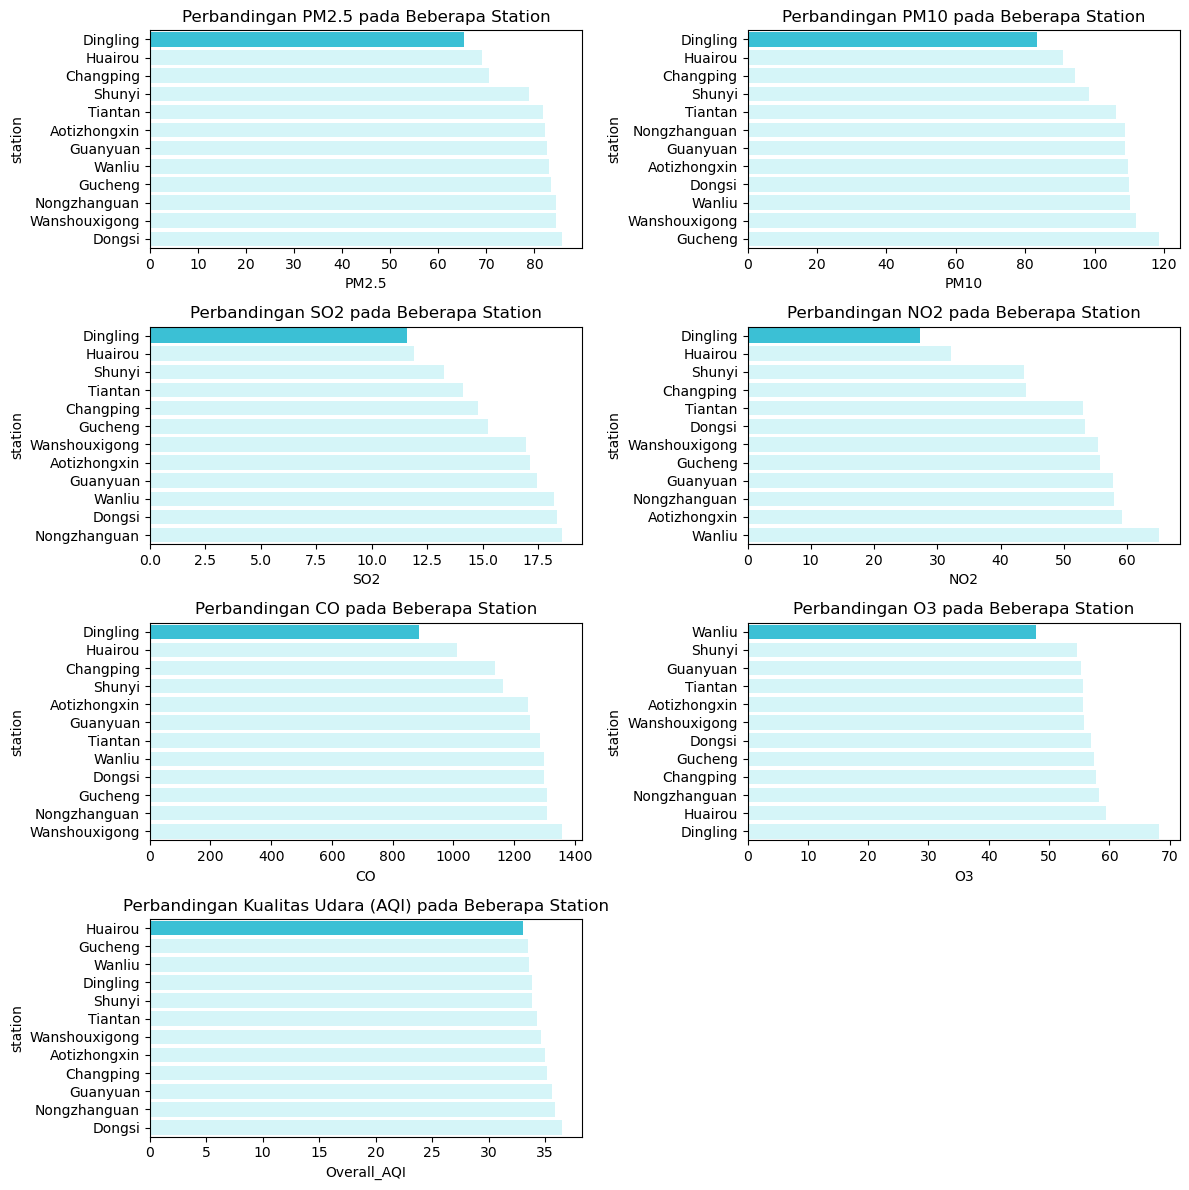

In [47]:
visualize_pollutan_by_station_handler(visualize_pollutan_by_station_obj)

### Pertanyaan 2:

In [48]:
def visualize_pollutan_by_time_handler(obj, timeline):
    """
    Function ini bertujuan untuk memvisualisasikan data polutan dan
    AQI berdasarkan waktu.

    Parameter:
    - obj       : Suatu object dengan format: 
                  {
                    nama_polutan: [nama_kolom, caption] 
                  }  

    - timeline  : Waktu yang ingin divisualisasikan. Terdapat tiga 
                  pilihan, yaitu "hour", "month", dan "year" (str)

    Return:
    - None
    """   

    try:
        if timeline not in ["hour", "month", "year"]:
            print("Timeline harus bernilai 'hour', 'month', atau 'year'")
        else:
            fig, axes = plt.subplots(4, 2, figsize = (12, 12))

            axes = axes.flatten()

            index = 0
            for pollutan, [column, caption] in obj.items():
                variable_name = f"{pollutan}_by{timeline}"

                variable = globals()[variable_name]
                variable = variable.reset_index()
                variable[timeline] = variable[timeline].astype(str)

                if not isinstance(variable, pd.DataFrame):
                    print(f"{variable_name} bukan bertipe data Pandas DataFrame")
                    continue

                sns.lineplot(y = variable[column], x = variable[timeline], ax = axes[index])

                if (timeline == "year"):
                    axes[index].set_title(f"Perkembangan {caption} Dalam Tahun")
                else:
                    axes[index].set_title(f"Rata-Rata {caption} Dalam {'Bulan' if timeline == 'month' else 'Jam'}")

                index = index + 1

            for i in range(index, 8):
                axes[i].axis("off")
            
            fig.tight_layout()
            plt.show()
            
    except Exception as e:
        print("Terjadi error ketika memvisualisasikan data: ", e)

In [49]:
visualize_pollutan_by_time_obj = {
    "pm25": ["PM2.5", "PM2.5"], 
    "pm10": ["PM10", "PM10"], 
    "so2": ["SO2", "SO2"], 
    "no2": ["NO2", "NO2"], 
    "co": ["CO", "CO"], 
    "o3": ["O3", "O3"],
    "aqi": ["Overall_AQI", "Kualitas Udara (AQI)"] 
}

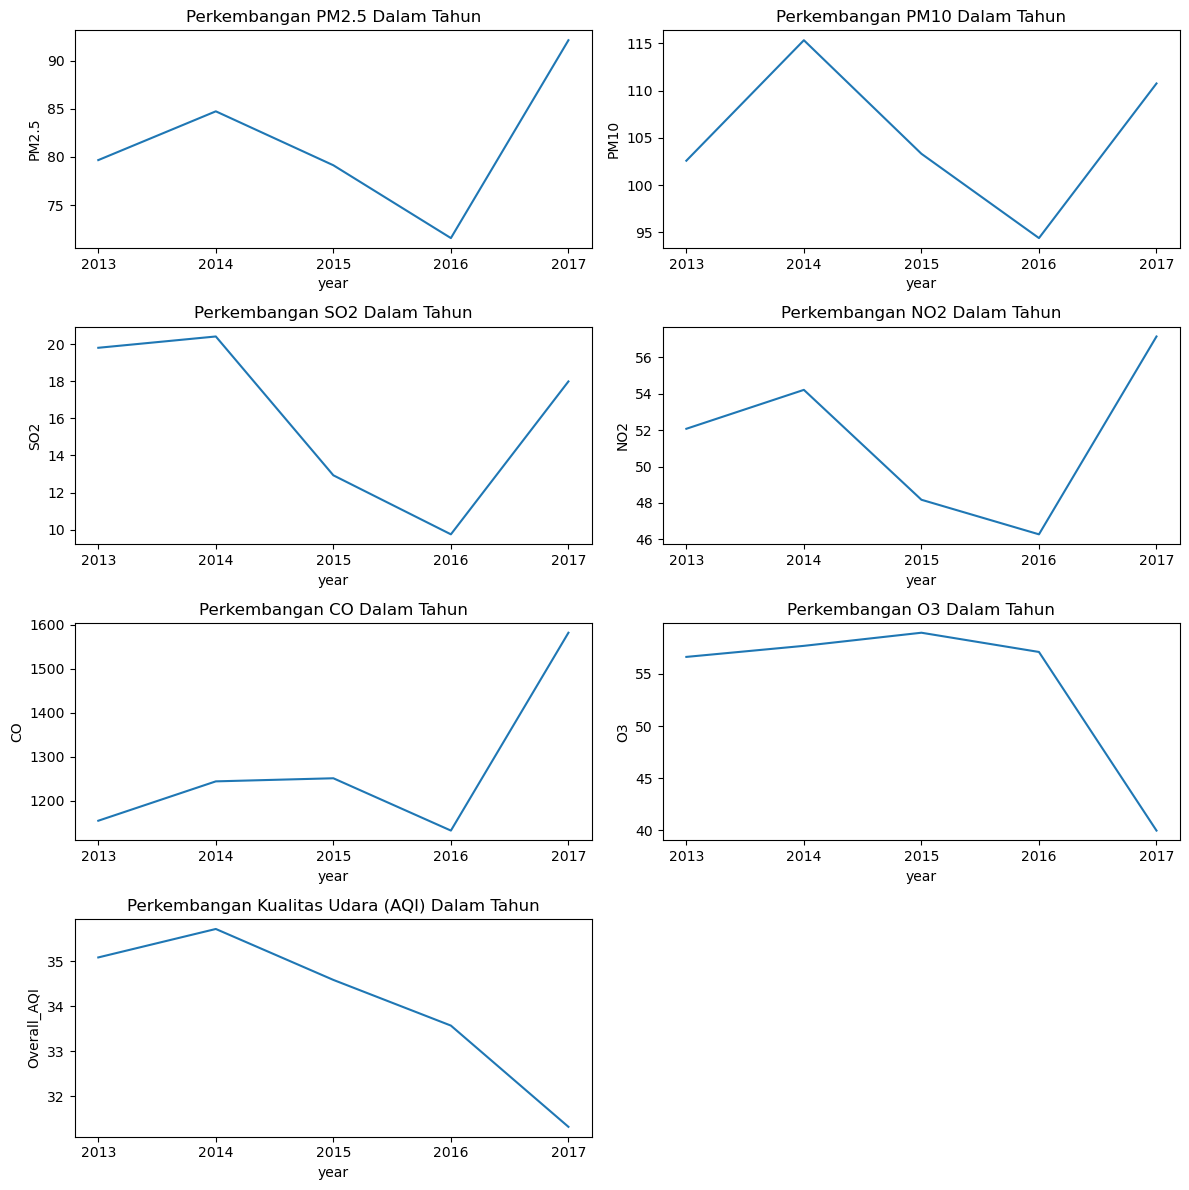

In [50]:
visualize_pollutan_by_time_handler(visualize_pollutan_by_time_obj, "year")

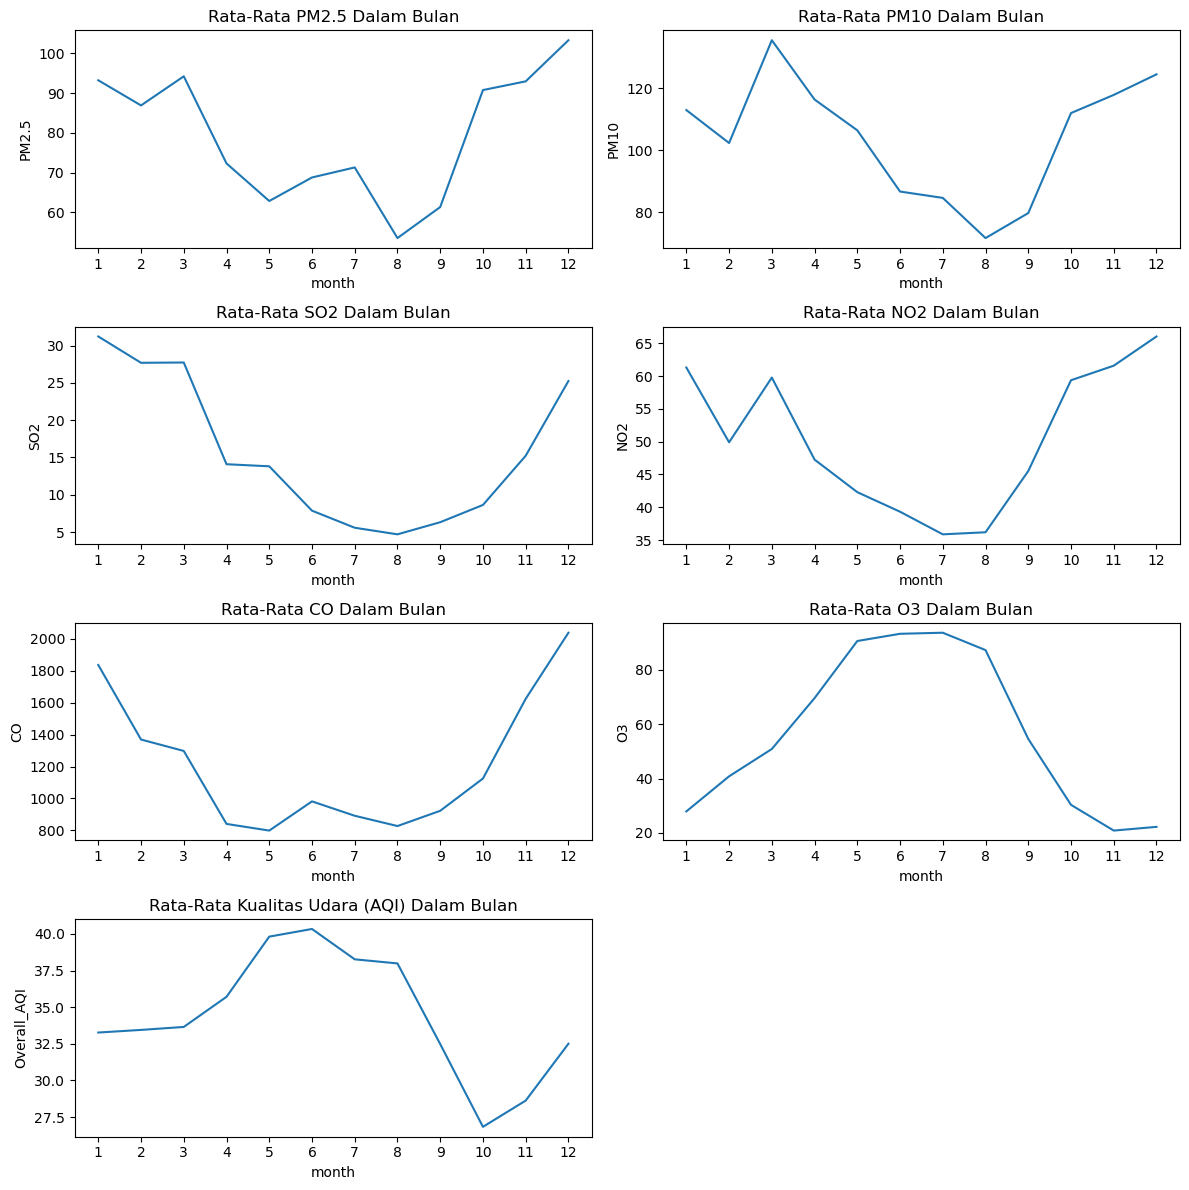

In [51]:
visualize_pollutan_by_time_handler(visualize_pollutan_by_time_obj, "month")

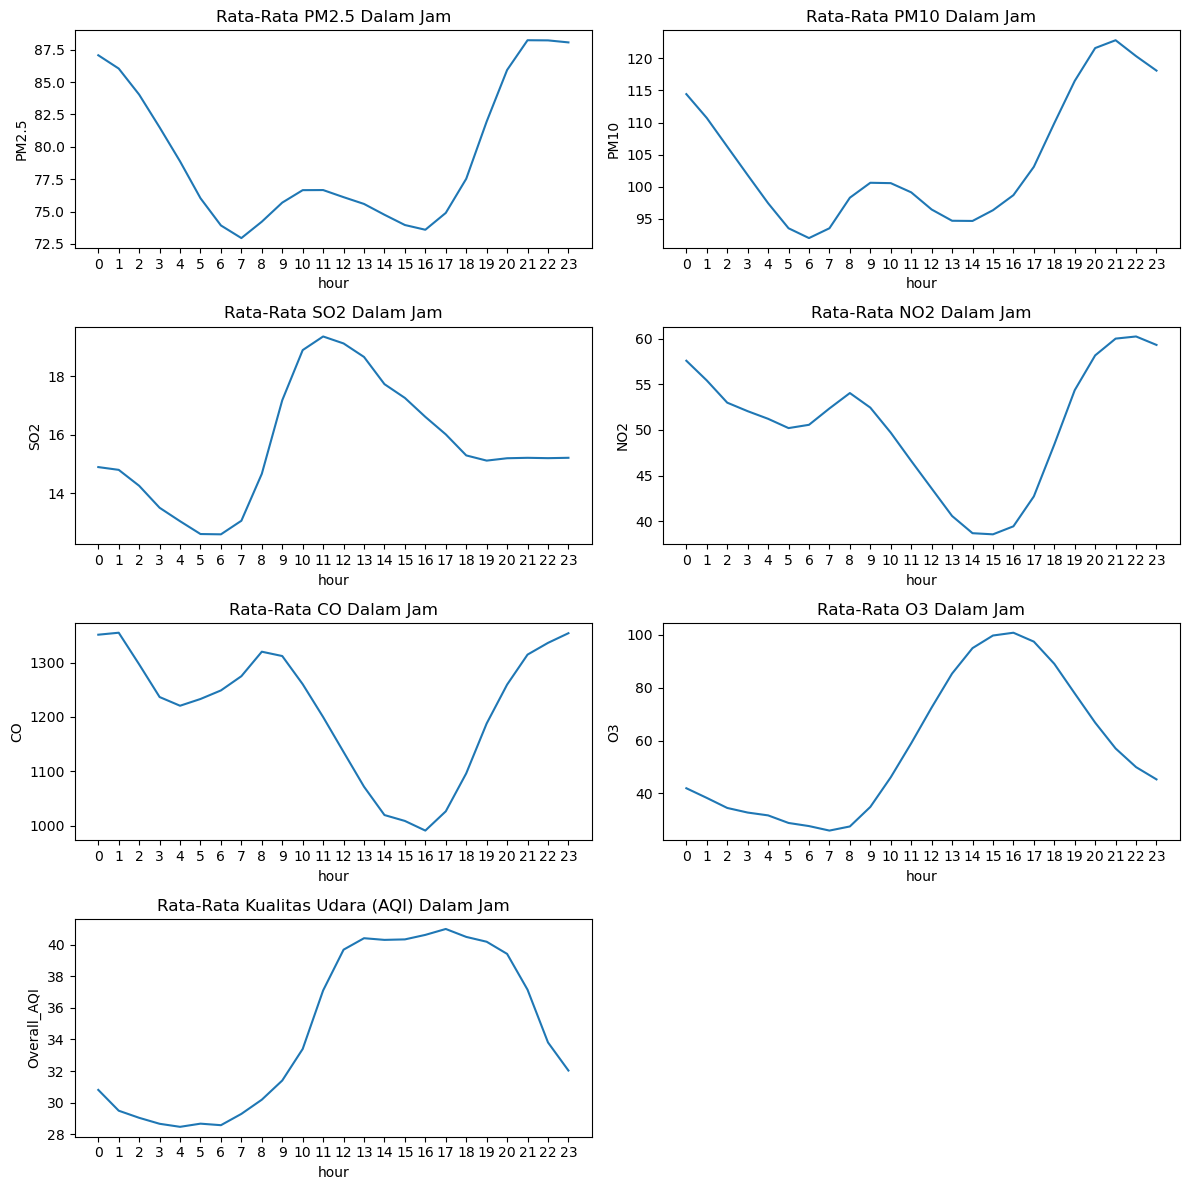

In [52]:
visualize_pollutan_by_time_handler(visualize_pollutan_by_time_obj, "hour")

**Insight:**
- Urutan station dengan kualitas udara terbaik adalah:
    - Huairou
    - Gucheng
    - Wanliu
    - Dingling
    - Shunyi
    - Tiantan
    - Wanshouxigong
    - Aotizhongxin
    - Changping
    - Guanyuan
    - Nongzhanguan
    - Dongsi
- Kualitas udara cenderung membaik setiap tahunnya.
- Bulan April hingga Agustus merupakan puncak kualitas udara terburuk.
- Siang dan sore hari merupakan puncak kualitas udara terburuk.

## Analisis Lanjutan

Teknik analisis lanjutan yang digunakan yaitu manual grouping clustering. Pada section ini, bulan akan digrouping berdasarkan musim dan jam digrouping berdasarkan waktu untuk memberikan informasi analisis tambahan.

In [53]:
def convert_month_to_season_handler(month):
    """
    Function ini bertujuan untuk mengubah bulan menjadi
    musim.

    Parameter:
    - month : Nomor bulan (int).

    Return:
    - String.

    """
    if 3 <= month <= 5:
        return "Spring"
    elif 6 <= month <= 8:
        return "Summer"
    elif 9 <= month <= 11:
        return "Autumn"
    else:
        return "Winter"

In [54]:
def convert_hour_to_times_handler(hour):
    """
    Function ini bertujuan untuk mengubah hour menjadi
    times of the day.    

    Parameter:
    - hour  : Jam (int)
    
    Return:
    - String
    """

    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 18:
        return "Afternoon"
    elif 18 <= hour < 21:
        return "Evening"
    else:
        return "Night"


In [55]:
all_df["season"] = all_df["month"].apply(lambda x: convert_month_to_season_handler(x))
all_df["times"] = all_df["hour"].apply(lambda x: convert_hour_to_times_handler(x))

In [56]:
aqi_byseason = groupby_handler(all_df, "Overall_AQI", "season", sort_type = "asc").reset_index()
aqi_bytimes = groupby_handler(all_df, "Overall_AQI", "times", sort_type = "asc").reset_index()

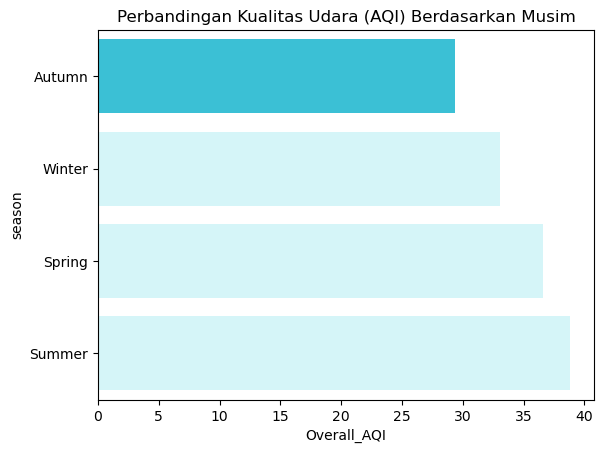

In [57]:
sns.barplot(y = aqi_byseason["season"], 
    x = aqi_byseason["Overall_AQI"], 
    hue  = aqi_byseason["season"],
    orient = "h", 
    palette = ["#22d3ee" if i == 0 else "#cffafe" for i in range(aqi_byseason.reset_index().shape[0])],
    legend = False
)

plt.title("Perbandingan Kualitas Udara (AQI) Berdasarkan Musim")
plt.show()

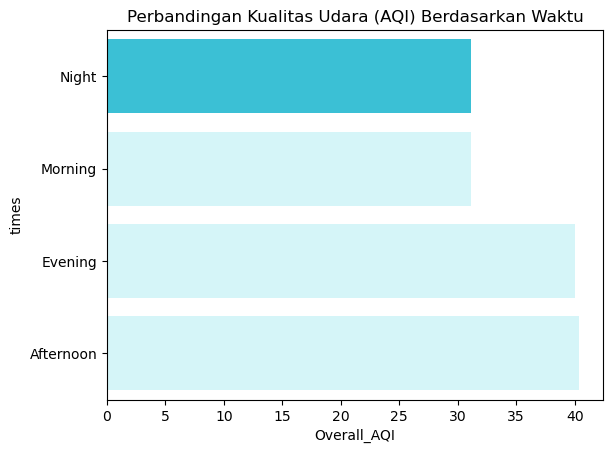

In [58]:
sns.barplot(y = aqi_bytimes["times"], 
    x = aqi_bytimes["Overall_AQI"], 
    hue  = aqi_bytimes["times"],
    orient = "h", 
    palette = ["#22d3ee" if i == 0 else "#cffafe" for i in range(aqi_bytimes.reset_index().shape[0])],
    legend = False
)

plt.title("Perbandingan Kualitas Udara (AQI) Berdasarkan Waktu")
plt.show()

In [59]:
all_df.to_csv("data/all_df.csv")

**Insight:**
- Urutan musim dengan kualitas udara terbaik, yaitu autumn, winter, spring, dan summer.
- Urutan waktu dengan kualitas udara terbaik, yaitu malam, pagi, sore, dan siang.

## Conclusion

- Urutan station dengan kualitas udara terbaik adalah:
    - Huairou
    - Gucheng
    - Wanliu
    - Dingling
    - Shunyi
    - Tiantan
    - Wanshouxigong
    - Aotizhongxin
    - Changping
    - Guanyuan
    - Nongzhanguan
    - Dongsi

- Waktu berpengaruh terhadap kualitas udara. Malam hari merupakan waktu dengan kualitas udara yang paling baik. Sedangkan, siang hari merupakan waktu dengan kualitas udara yang paling buruk. Selain itu, musim juga berpengaruh terhadap kualitas udara. Musim autumn memiliki kualitas udara yang paling baik. Sedangkan, summer memiliki kualitas udara yang paling buruk.